<div style="color:red; background-color:lime; padding:3%; border-radius:150px 150px; font-size:2em; text-align:center">Problem Statement: To find whether the person is vaccinated or not</div>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Model evaluation tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv("h1n1_vaccine_prediction.csv")

In [31]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [32]:
df.shape

(26707, 34)

In [33]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [34]:
df.drop(['unique_id','contact_avoidance', 'bought_face_mask', 'wash_hands_frequently','reduced_outside_home_cont','avoid_touch_face','is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc','qualification','housing_status','no_of_adults', 'no_of_children','dr_recc_seasonal_vacc','cont_child_undr_6_mnths'], axis=1, inplace=True)

In [35]:
df.dtypes

h1n1_worry                 float64
h1n1_awareness             float64
antiviral_medication       float64
avoid_large_gatherings     float64
dr_recc_h1n1_vacc          float64
chronic_medic_condition    float64
is_health_worker           float64
has_health_insur           float64
is_h1n1_vacc_effective     float64
is_h1n1_risky              float64
sick_from_h1n1_vacc        float64
age_bracket                 object
race                        object
sex                         object
income_level                object
marital_status              object
employment                  object
census_msa                  object
h1n1_vaccine                 int64
dtype: object

In [36]:
df.isnull().sum()

h1n1_worry                    92
h1n1_awareness               116
antiviral_medication          71
avoid_large_gatherings        87
dr_recc_h1n1_vacc           2160
chronic_medic_condition      971
is_health_worker             804
has_health_insur           12274
is_h1n1_vacc_effective       391
is_h1n1_risky                388
sick_from_h1n1_vacc          395
age_bracket                    0
race                           0
sex                            0
income_level                4423
marital_status              1408
employment                  1463
census_msa                     0
h1n1_vaccine                   0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

h1n1_worry                 0
h1n1_awareness             0
antiviral_medication       0
avoid_large_gatherings     0
dr_recc_h1n1_vacc          0
chronic_medic_condition    0
is_health_worker           0
has_health_insur           0
is_h1n1_vacc_effective     0
is_h1n1_risky              0
sick_from_h1n1_vacc        0
age_bracket                0
race                       0
sex                        0
income_level               0
marital_status             0
employment                 0
census_msa                 0
h1n1_vaccine               0
dtype: int64

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

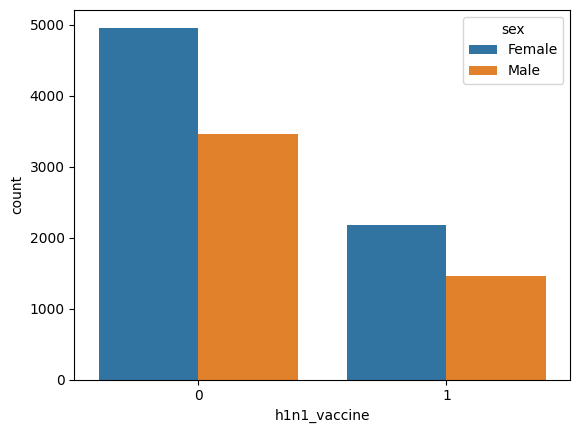

In [40]:
sns.countplot(x='h1n1_vaccine', hue='sex', data=df)

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

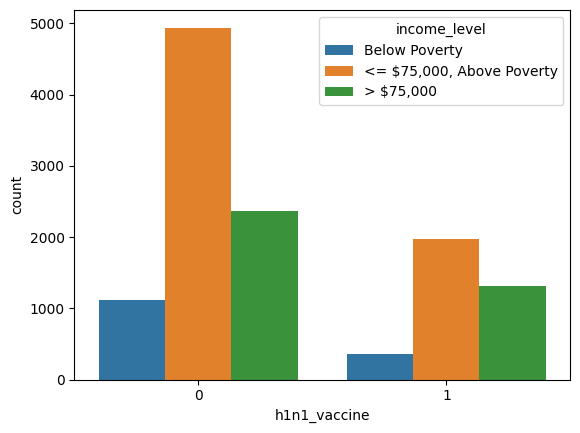

In [41]:
sns.countplot(x='h1n1_vaccine', hue='income_level', data=df)

In [42]:
correlation_mat = df.corr()
correlation_mat

,h1n1_worry,h1n1_awareness,antiviral_medication,avoid_large_gatherings,dr_recc_h1n1_vacc,chronic_medic_condition,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,h1n1_vaccine
h1n1_worry,1.000000,0.046993,0.110267,0.243174,0.156696,0.097590,0.018928,-0.003178,0.262606,0.364190,0.335981,0.187520
h1n1_awareness,0.046993,1.000000,-0.011710,-0.053049,0.097987,-0.009879,0.187843,0.124821,0.123233,0.078616,-0.026028,0.160390
antiviral_medication,0.110267,-0.011710,1.000000,0.111075,0.042624,0.008916,0.002445,-0.063812,0.019052,0.110820,0.086908,0.020508
avoid_large_gatherings,0.243174,-0.053049,0.111075,1.000000,0.077470,0.112774,-0.035532,-0.064070,0.064538,0.131112,0.186254,0.037027
dr_recc_h1n1_vacc,0.156696,0.097987,0.042624,0.077470,1.000000,0.160271,0.077082,0.062411,0.170758,0.272677,0.108595,0.416843
chronic_medic_condition,0.097590,-0.009879,0.008916,0.112774,0.160271,1.000000,-0.014748,0.061117,0.057450,0.118264,0.071662,0.111867
is_health_worker,0.018928,0.187843,0.002445,-0.035532,0.077082,-0.014748,1.000000,0.046677,0.057201,0.120537,0.011897,0.174316
has_health_insur,-0.003178,0.124821,-0.063812,-0.064070,0.062411,0.061117,0.046677,1.000000,0.058554,0.005145,-0.037289,0.122642
is_h1n1_vacc_effective,0.262606,0.123233,0.019052,0.064538,0.170758,0.057450,0.057201,0.058554,1.000000,0.308591,0.073136,0.315108
is_h1n1_risky,0.364190,0.078616,0.110820,0.131112,0.272677,0.118264,0.120537,0.005145,0.308591,1.000000,0.314504,0.423616


In [43]:
df.describe(include='all')

,h1n1_worry,h1n1_awareness,antiviral_medication,avoid_large_gatherings,dr_recc_h1n1_vacc,chronic_medic_condition,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,age_bracket,race,sex,income_level,marital_status,employment,census_msa,h1n1_vaccine
count,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061,12061,12061,12061,12061,12061,12061,12061.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2,3,2,3,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,White,Female,"<= $75,000, Above Poverty",Married,Employed,"MSA, Not Principle City",NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2853,9655,7138,6909,6467,6716,5221,NaN
mean,1.528314,1.268966,0.053727,0.332808,0.249731,0.294669,0.117072,0.881353,3.957964,2.310837,2.293923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30155
std,0.885931,0.605768,0.225487,0.471238,0.432875,0.455913,0.321519,0.323386,0.988981,1.286093,1.343588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


In [44]:
df.dtypes

h1n1_worry                 float64
h1n1_awareness             float64
antiviral_medication       float64
avoid_large_gatherings     float64
dr_recc_h1n1_vacc          float64
chronic_medic_condition    float64
is_health_worker           float64
has_health_insur           float64
is_h1n1_vacc_effective     float64
is_h1n1_risky              float64
sick_from_h1n1_vacc        float64
age_bracket                 object
race                        object
sex                         object
income_level                object
marital_status              object
employment                  object
census_msa                  object
h1n1_vaccine                 int64
dtype: object

In [45]:
df = pd.get_dummies(df, columns=['age_bracket','race','sex','income_level','marital_status', 'employment', 'census_msa'])

In [47]:
X = df.drop(['h1n1_vaccine'], axis=1)
y = df[['h1n1_vaccine']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Fitting the model

In [49]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
model

LogisticRegression()

In [50]:
model.score(X_train, y_train)

0.8131959251362236

In [51]:
model.score(X_test, y_test)

0.8201160541586073

In [52]:
#Constructing a Decision Tree
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [53]:
dtree.score(X_train, y_train)

0.7986259180289031

In [54]:
dtree.score(X_test, y_test)

0.8007736943907157

In [58]:
dtreeR = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [59]:
dtreeR.fit(X_train, y_train)
print(dtreeR.score(X_train, y_train))

0.7986259180289031


In [62]:
y_predict = dtreeR.predict(X_test)

In [63]:
print(dtreeR.score(X_test, y_test))

0.8007736943907157


In [64]:
from sklearn import metrics

<AxesSubplot: >

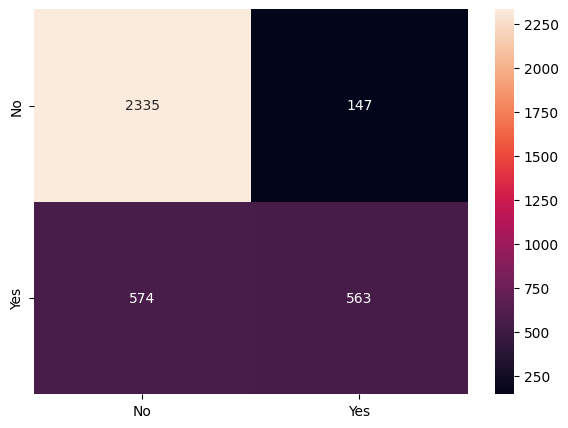

In [65]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                    columns = [i for i in ['No', 'Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### Implementing AdaBoost Classifier

In [66]:
abcl = AdaBoostClassifier(n_estimators=60, random_state=0)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))
print(abcl.score(X_train, y_train))

0.820392373583863
0.8140251125325753


### Implementing GradientBoostingClassifier

In [67]:
gbcl = GradientBoostingClassifier(n_estimators=70, random_state=0)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
print(gbcl.score(X_train, y_train))

0.8195634153080962
0.8204217010187159


### Implementing RandomForestClassifier

In [68]:
rfcl = RandomForestClassifier(n_estimators = 130, random_state=0, max_features=3, max_depth=3)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(rfcl.score(X_train, y_train))

0.7421939762365294
0.7523098791755508
